# Graphs in Theory


The first three chapters of the book are models that can be described as graphs. Graph here is a representation of a system consisting of interconnected elements. You can find more information about it on wiki:https://en.wikipedia.org/wiki/Graph_(discrete_mathematics)

Typically, the elements in a graph are called *nodes*, and the interconnections are called *edges*. Graph is a natural way to represent the real world, for example, you can represent a road map with nodes for cities and edges for roads between cities, graphs can also be used to represent social networks with nodes as people, and edges as relationships such as friends, business associates, et al.

Edges may be directed or undirected, depending on whether the connections are asymmetric or symmetric.

The first chapter is about graph basics and the introduction of [*networkx*](https://networkx.github.io/), an excellent Python package for network(graph) study which I already heared about before, so it's a good opportunity for me to dive more deeply into it.

From this chapter, I learned how to create a graph from scrach, how to create some typical widely studied graphs(complete graphs, ER graph) and how to draw them.

## Sections

- [Platform Information](#Platform-Information)

- [Create Undirected Graph](#Create-Undirected-Graph)

- [Create Directed Graph](#Create-Directed-Graph)

- [Create Complete Graphs](#Create-Complete-Graphs)

- [Create Random Graphs](#Create-Random-Graphs)

## Platform Information

For convenience, I use [*watermark*](https://github.com/rasbt/watermark), an IPython magic extension writen by Sebastian Raschka.

In [56]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [57]:
%watermark -v -p networkx,matplotlib

CPython 2.7.12
IPython 5.1.0

networkx 1.11
matplotlib 1.5.3


## Create Undirected Graph

Firstly, we need to import *networkx*

In [58]:
import networkx as nx

It's conventional to import *networkx* as *nx*. Then undirected graph can be instantiated using nx.Graph. As an example, I'll construct a graph representing the real geographical placement of several Chinese cities.

In [59]:
G = nx.Graph()
pos = {'Taiyuan':(112, 37), 'Wuhan':(114, 30), 'Shijiazhuang':(114, 38), 'Sichuan':(104, 30)}
dis = {}
for i in pos:
    for j in pos:
        if (i != j) and (i in ['Taiyuan','Wuhan']):
            dis[(i,j)] = int(((pos[i][0] - pos[j][0])**2 + (pos[i][1] - pos[j][1])**2) ** 0.5)

*pos* contains the node labels and corresponding coordinates, and *dis* represents edges and corresponding weights(here, rough air line distances between cities).

In [60]:
G.add_nodes_from(pos)
G.add_edges_from(dis)

Now, use *nodes* and *edges* methods to extract corresponding information.

In [61]:
G.nodes()

['Wuhan', 'Sichuan', 'Taiyuan', 'Shijiazhuang']

In [62]:
G.edges()

[('Wuhan', 'Sichuan'),
 ('Wuhan', 'Taiyuan'),
 ('Wuhan', 'Shijiazhuang'),
 ('Sichuan', 'Taiyuan'),
 ('Taiyuan', 'Shijiazhuang')]

*networkx* provides convenient functions for drawing graphs

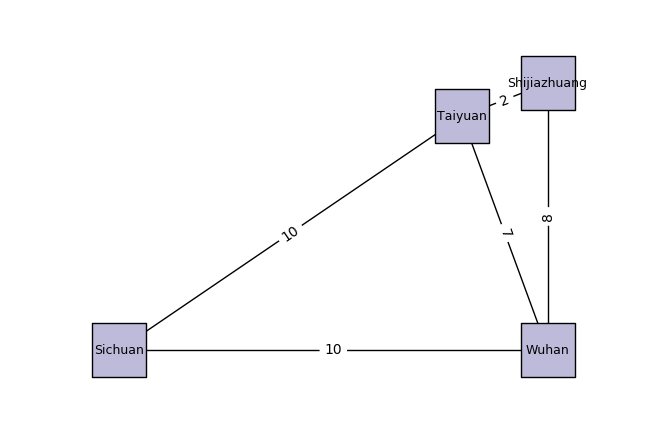

In [63]:
import matplotlib.pyplot as plt
nx.draw(G, pos, node_color='#BEBADA',
       node_shape='s', node_size=1500,
       with_labels=False)
nx.draw_networkx_labels(G, pos, font_size=9)
nx.draw_networkx_edge_labels(G, pos, edge_labels=dis)
plt.show()

## Create Directed Graph

You can create a directed graph using *networkx* by replacing *nx.Graph* with *nx.DiGraph*. Here's an example:

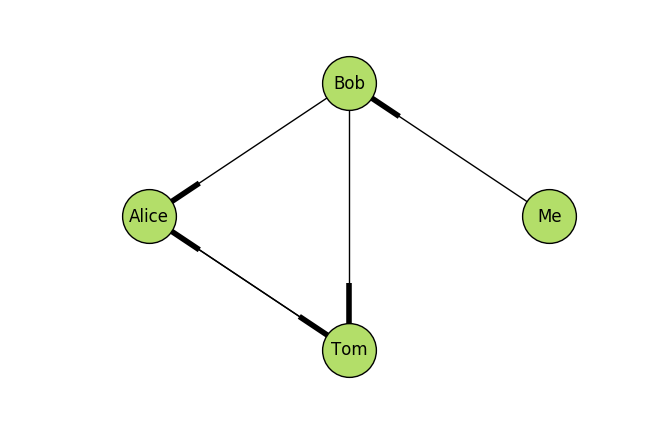

In [64]:
G = nx.DiGraph()
people = ['Bob', 'Alice', 'Tom', 'Me']
G.add_nodes_from(people)
know = [('Bob', 'Alice'), ('Bob', 'Tom'), ('Me', 'Bob'), ('Alice', 'Tom'), ('Tom', 'Alice')]
G.add_edges_from(know)
nx.draw_circular(G, node_color='#B3DE69', node_size=1500, with_labels=True)
plt.show()

## Create Complete Graphs

Complete graphs contain all possible edges between nodes. Therefore, we first define a function which takes a list of nodes and enumerate all possible node pairs.

In [65]:
def possible_pair(nodes):
    for i, v in enumerate(nodes):
        for j, w in enumerate(nodes):
            if i > j:
                yield v, w

Then we can use *possible_pair* as the core for generating complete graphs.

In [66]:
def complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    edges = possible_pair(nodes)
    G.add_edges_from(edges)
    return G

*complete_graph* takes only one parameter which determines the number of nodes.

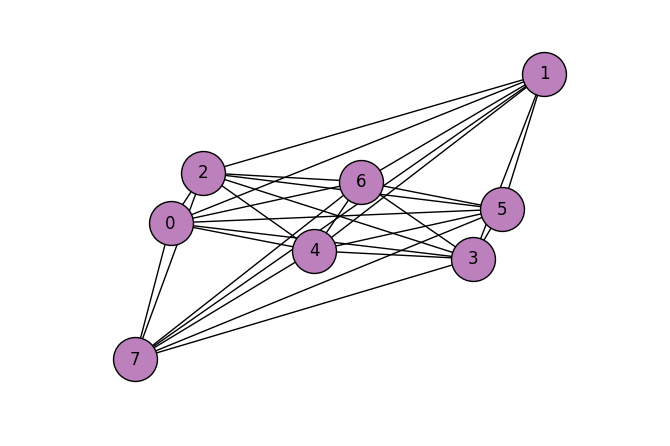

In [67]:
G = complete_graph(8)
nx.draw(G, node_color='#BC80BD', node_size=1000, with_labels=True)
plt.show()

## Create Random Graphs

There are many random processes for generating random graphs. Here, we consider a model first introduced by Paul Erdős and Alfréd Rényi in 1959. Refer wiki https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model page for more information.

There are two closely related variants of the Erdős–Rényi (ER) random graph model:

The first one, often represented as G(n,p), takes two parameters, n is the number of nodes, and p is the probability that there is an edge between two nodes.

The second one is represented as G(n,m), in which the number of edges, m, is fixed, but their locations are random.

As you can see later, both variants can be implemented in a similar way we used for generating complete graphs.

### G(n,p) variant

In [68]:
import random

def random_pair(nodes, p):
    for i, v in enumerate(nodes):
        for j, w in enumerate(nodes):
            if (i > j) and (random.random() < p):
                yield v, w

In [69]:
def ER_gnp(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    edges = random_pair(nodes, p)
    G.add_edges_from(edges)
    return G

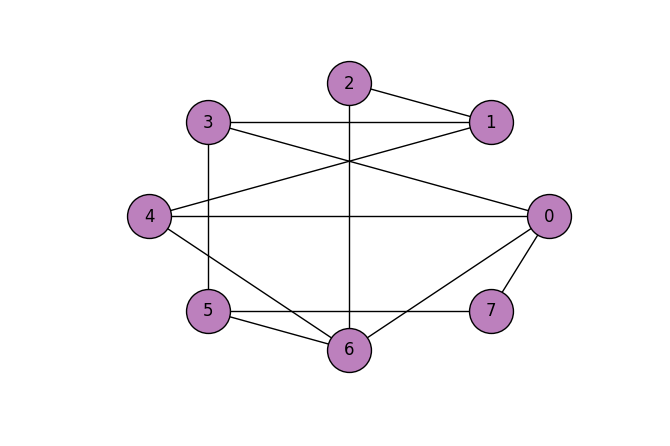

In [70]:
G = ER_gnp(8, 0.3)
nx.draw_circular(G, node_color='#BC80BD', node_size=1000, with_labels=True)
plt.show()

### G(n,m) variant

In [71]:
def m_pairs(nodes, m):
    pairs = list(possible_pair(nodes))
    selected = random.sample(pairs, m)
    return selected

In [72]:
def ER_gnm(n, m):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    edges = m_pairs(nodes, m)
    G.add_edges_from(edges)
    return G

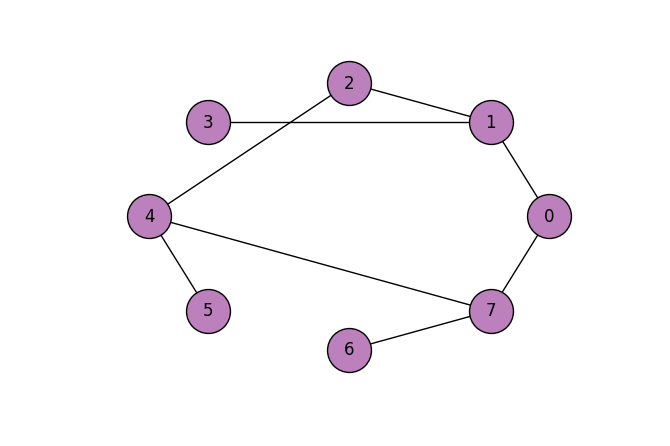

In [73]:
G = ER_gnm(8, 8)
nx.draw_circular(G, node_color='#BC80BD', node_size=1000, with_labels=True)
plt.show()

ER random graphs have many interesting properities.In following notebooks, we will investigate one of the properties related to graph connectivity.